https://docs.pennylane.ai/projects/qiskit/en/latest/devices/ibmq.html

In [ ]:
pip install qiskit-aer

In [ ]:
'''

Testing different sequence length and artifical mutatations with the Swap Test
Available backends are:'ibm_brisbane', 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
This circuit is curently leading to an internal server error

'''

import pennylane as qml
from pennylane import numpy as np
#from pennylane.optimize import AdamOptimizer
import random as rn
from matplotlib import pyplot as plt

token=''

def DNA_encoder_complex(seq):

    '''
    Complex encoding of a DNA sequence
    The function returns a list of complex numbers
    
    Copyright Berend Rah 2024 https://www.linkedin.com/in/berendrah/
    https://github.com/Quvance


    '''
    
    DNA_list=list(seq)
    encode_DNA={'A':'-1','T':'1','C':'-1j','G':'1j', 'R':'-1+j'}   # R is an ambiguous result which could either be A or G
    encoded_seq=np.array([complex(encode_DNA[base]) for base in DNA_list])
    return encoded_seq

def random_DNA_gen(GC_percentage, seq_length):
    '''
    This function creates a random DNA seq of length 'seq_length' based on the percentages of GC

    Copyright 2024 Berend Rah -- quvance.com

    '''
    seq_list=[]
    
    
    for i in range(seq_length):
        if np.random.random()<GC_percentage/100:
            seq_list.append('GC'[rn.randint(0,1)])
        else:
            seq_list.append('AT'[rn.randint(0,1)])

    seq=''.join(seq_list)
    
    return seq

def mutate_seq(seq,mut):

    '''
    
    This function mutates mut random bases of sequence seq
    Choose a random position and change the base to one of the other 3 bases
    
    '''
    seq_list=list(seq)
    bases=['A','C','G','T']
    pos_list=[]
    
    for i in range(mut):
        samePosition=True
        while samePosition:
            pos=rn.randint(0,len(seq)-1)
            
            if pos not in pos_list:
                samePosition=False
                pos_list.append(pos)
        
        sameBase=True
        while sameBase:
            new_base=bases[rn.randint(0,3)]
            if new_base!=seq_list[pos]:
                sameBase=False
                seq_list[pos]=new_base

    seq=''.join(seq_list)
    return seq          
                
i =8
seq_len=2**i

dev = qml.device("qiskit.aer", wires=range(2*i+1), shots=1000)              

@qml.qnode(dev)

def SWAP_test(seq1,seq2,qubits):

    '''
    There are 2 quantum state of equal size - each one of size (qubits-1)/2
    
    '''

    enc_seq1=DNA_encoder_complex(seq1)
    enc_seq2=DNA_encoder_complex(seq2)

    qml.AmplitudeEmbedding(features=enc_seq1, wires=range(1,int((qubits-1)/2+1)), normalize=True, pad_with=0.)
    qml.AmplitudeEmbedding(features=enc_seq2, wires=range(int((qubits-1)/2+1),qubits), normalize=True, pad_with=0.)

    #qml.AmplitudeEmbedding(features=enc_seq1, wires=range(1,5), normalize=True, pad_with=0.)
    #qml.AmplitudeEmbedding(features=enc_seq2, wires=range(5,9), normalize=True, pad_with=0.)

    qml.Hadamard(0)
    for i in range(1,int((qubits-1)/2+1)):
        qml.CSWAP(wires=[0, i, i+int((qubits-1)/2)])  # pairwise comparison of qubits
    qml.Hadamard(0)

    probs=qml.probs(wires=[0])

    return probs



    
seq_1=random_DNA_gen(50,seq_len)

m=np.arange(200, dtype=int)
probs=np.arange(200,dtype=float)
for j in range (200):
    seq_2=mutate_seq(seq_1,j)
    prob=SWAP_test(seq_1,seq_2,2*i+1)
    probs[j]=prob[0]*2-1

plt.plot(m,probs,color='r')
plt.xlabel('Number of mutations out of '+ str(2**i))
plt.ylabel('Probability of overlap')

plt.show()


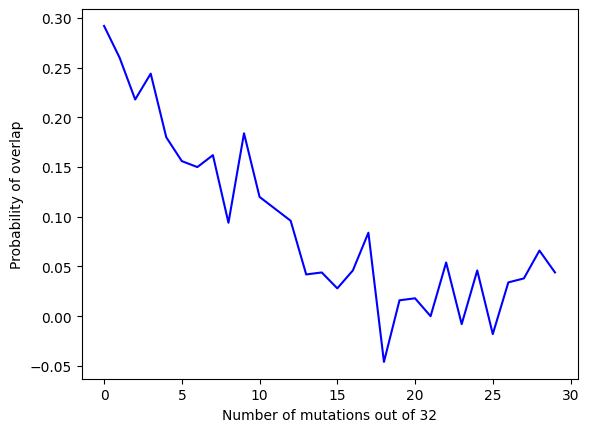

In [3]:
'''

This circuit simulates noise. It has only been tested with 5 qubits due to the long run time of the programme.

'''

import pennylane as qml
from pennylane import numpy as np
import random as rn
from matplotlib import pyplot as plt
from qiskit_aer import noise

# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])




def DNA_encoder_complex(seq):

    '''
    Complex encoding of a DNA sequence
    The function returns a list of complex numbers
    
    Copyright Berend Rah 2024 https://www.linkedin.com/in/berendrah/
    https://github.com/Quvance


    '''
    
    DNA_list=list(seq)
    encode_DNA={'A':'-1','T':'1','C':'-1j','G':'1j', 'R':'-1+j'}   # R is an ambiguous result which could either be A or G
    encoded_seq=np.array([complex(encode_DNA[base]) for base in DNA_list])
    return encoded_seq

def random_DNA_gen(GC_percentage, seq_length):
    '''
    This function creates a random DNA seq of length 'seq_length' based on the percentages of GC

    Copyright 2024 Berend Rah -- quvance.com

    '''
    seq_list=[]
    
    
    for i in range(seq_length):
        if np.random.random()<GC_percentage/100:
            seq_list.append('GC'[rn.randint(0,1)])
        else:
            seq_list.append('AT'[rn.randint(0,1)])

    seq=''.join(seq_list)
    
    return seq

def mutate_seq(seq,mut):

    '''
    
    This function mutates mut random bases of sequence seq
    Choose a random position and change the base to one of the other 3 bases
    
    '''
    seq_list=list(seq)
    bases=['A','C','G','T']
    pos_list=[]
    
    for i in range(mut):
        samePosition=True
        while samePosition:
            pos=rn.randint(0,len(seq)-1)
            
            if pos not in pos_list:
                samePosition=False
                pos_list.append(pos)
        
        sameBase=True
        while sameBase:
            new_base=bases[rn.randint(0,3)]
            if new_base!=seq_list[pos]:
                sameBase=False
                seq_list[pos]=new_base

    seq=''.join(seq_list)
    return seq          
                
i =8
seq_len=2**i

dev = qml.device("qiskit.aer", wires=range(2*i+1), noise_model=noise_model, shots=1000)              

@qml.qnode(dev)

def SWAP_test(seq1,seq2,qubits):

    '''
    There are 2 quantum state of equal size - each one of size (qubits-1)/2
    
    '''

    enc_seq1=DNA_encoder_complex(seq1)
    enc_seq2=DNA_encoder_complex(seq2)

    qml.AmplitudeEmbedding(features=enc_seq1, wires=range(1,int((qubits-1)/2+1)), normalize=True, pad_with=0.)
    qml.AmplitudeEmbedding(features=enc_seq2, wires=range(int((qubits-1)/2+1),qubits), normalize=True, pad_with=0.)

    #qml.AmplitudeEmbedding(features=enc_seq1, wires=range(1,5), normalize=True, pad_with=0.)
    #qml.AmplitudeEmbedding(features=enc_seq2, wires=range(5,9), normalize=True, pad_with=0.)

    qml.Hadamard(0)
    for i in range(1,int((qubits-1)/2+1)):
        qml.CSWAP(wires=[0, i, i+int((qubits-1)/2)])  # pairwise comparison of qubits
    qml.Hadamard(0)

    probs=qml.probs(wires=[0])

    return probs

i=5
seq_len=2**i
    
seq_1=random_DNA_gen(50,seq_len)

m=np.arange(30, dtype=int)
probs=np.arange(30,dtype=float)
for j in range (30):
    seq_2=mutate_seq(seq_1,j)
    prob=SWAP_test(seq_1,seq_2,2*i+1)
    probs[j]=prob[0]*2-1

plt.plot(m,probs,color='b')
plt.xlabel('Number of mutations out of '+ str(2**i))
plt.ylabel('Probability of overlap')

plt.show()
